# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Data Understanding

Perkembangan industri telekomunikasi sangatlah cepat, hal ini dapat dilihat dari perilaku masyarakat yang menggunakan internet dalam berkomunikasi. 

Perilaku ini menyebabkan banyaknya perusahaan telekomunikasi dan meningkatnya internet service provider yang dapat menimbulkan persaingan antar provider. 

Pelanggan memiliki hak dalam memilih provider yang sesuai dan dapat beralih dari provider sebelumnya yang diartikan sebagai **Customer Churn**. 

Peralihan ini dapat menyebabkan berkurangnya pendapatan bagi perusahaan telekomunikasi sehingga penting untuk ditangani.

## Explaining Dataset

Deskripsi masing-masing kolom:
- `state`, US State
- `account_length`, Total bulan customer menjadi user telco provider
- `area_code`, Kode area
- `international_plan`, Customer memiliki plan international
- `voice_mail_plan`, Customer memiliki plan voice mail
- `number_vmail_messages`, Total pesan voice mail
- `total_day_minutes`, Total minutes pada day calls
- `total_day_call`, Total day call
- `total_day_charge`, Total charge dari day calls
- `total_eve_minutes`, Total menit pada evening call
- `total_eve_calls`, Total evening calls
- `total_eve_charge`, Total charge pada evening call
- `total_night_minutes`, Total menit pada night call
- `total_night_calls`, Total night call
- `total_night_charge`, Total charge pada night call
- `total_intl_minutes`, Total menit pada international call
- `total_intl_calls`, Total international call
- `total_intl_charge`, Total charge pada international call
- `number_customer_service_calls`, Total call kepada customer service
- `churn`, Customer churn

# Read Data

In [2]:
df_train = pd.read_csv('./Datasets/train.csv')
df_test = pd.read_csv('./Datasets/test.csv')

In [3]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Identify Dataset

In [4]:
df_train.shape, df_test.shape

((4250, 20), (750, 20))

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [7]:
df_train.isnull().sum().sum(), df_test.isnull().sum().sum()

(0, 0)

In [8]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

In [9]:
for col_name in df_train.select_dtypes(include=['object']).columns.tolist():
    print('Variable ',col_name)
    print(df_train[col_name].unique())

Variable  state
['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
Variable  area_code
['area_code_415' 'area_code_408' 'area_code_510']
Variable  international_plan
['no' 'yes']
Variable  voice_mail_plan
['yes' 'no']
Variable  churn
['no' 'yes']


In [10]:
df_train.drop(['state','area_code'], axis=1, inplace=True)
df_test.drop(['id','state','area_code'], axis=1, inplace=True)

In [11]:
df_train['target'] = LabelBinarizer().fit_transform(df_train['churn'])

In [12]:
num_feature = df_train.select_dtypes(include=['number']).columns.tolist()
cat_feature = df_train.select_dtypes(include=['object']).columns.tolist()

# Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:
- Statistik Dasar.
- Univariat Analysis — analisis deskriptif dengan satu variabel.
- Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
- Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.
- Outlier Detection.

In [13]:
df_train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


## Univariat Analysis

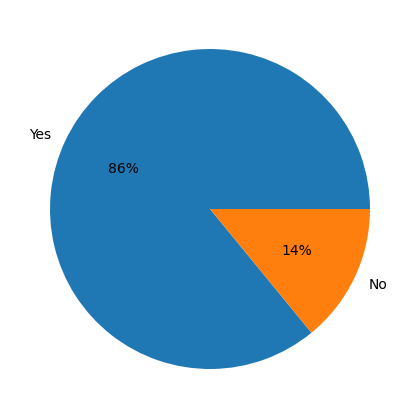

In [14]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_train.churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.tight_layout()
plt.show()

## Bivariat Analysis Numerical Variable

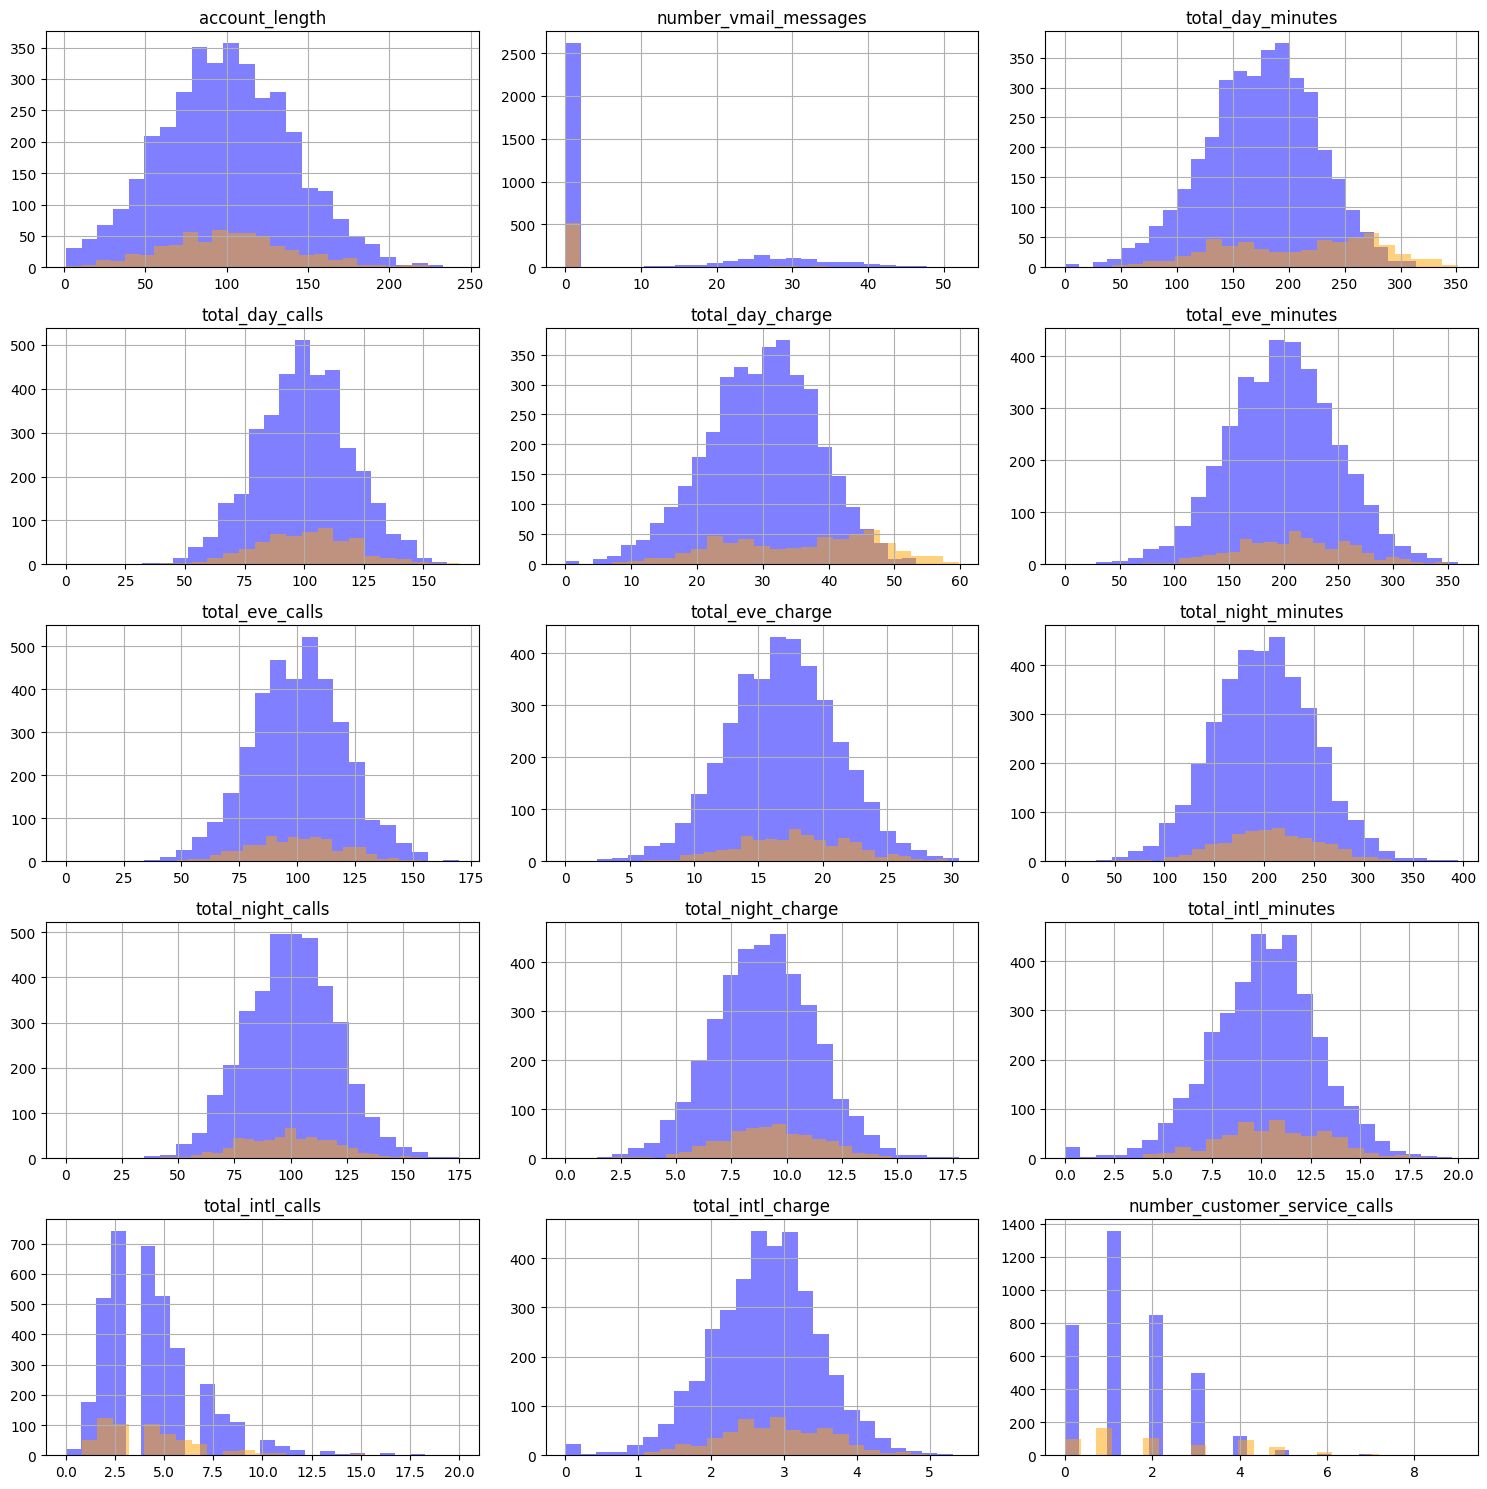

In [20]:
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
df_train[df_train.churn == 'no'][num_feature[:-1]].hist(bins=25, color='blue', alpha=0.5, ax=ax)
df_train[df_train.churn == 'yes'][num_feature[:-1]].hist(bins=25, color='orange', alpha=0.5, ax=ax)
plt.tight_layout()
plt.show()

## Bivariat Analysis Categorical Variable

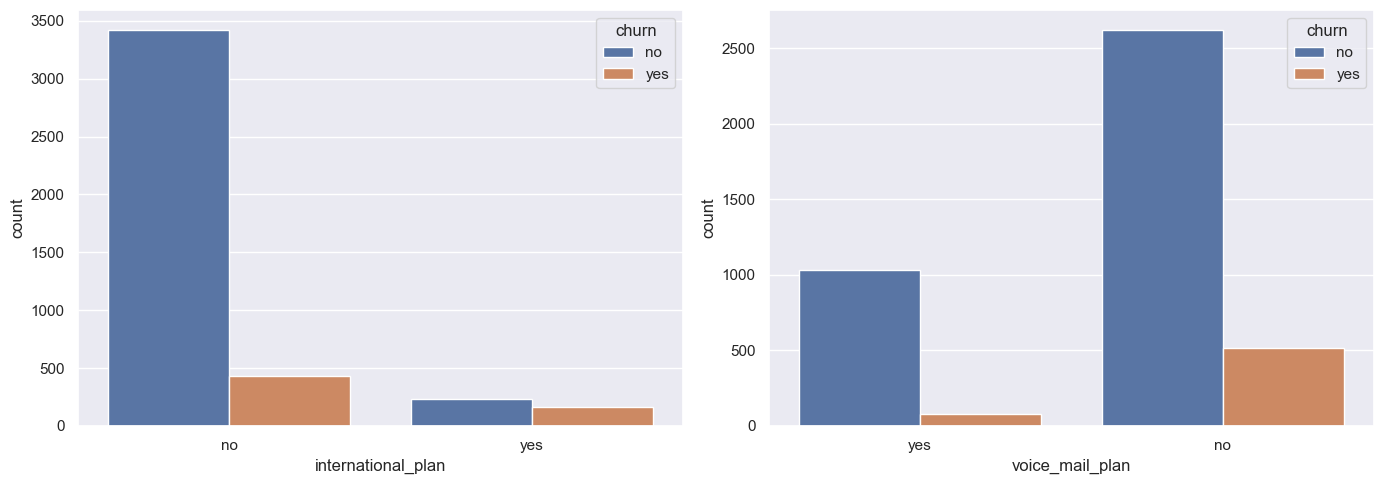

In [22]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(data=df_train, x='international_plan', hue='churn', ax=ax[0])
sns.countplot(data=df_train, x='voice_mail_plan', hue='churn', ax=ax[1])
plt.tight_layout()
plt.show()

## Multivariat Analysis

In [23]:
df_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,target
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.046647
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.012699


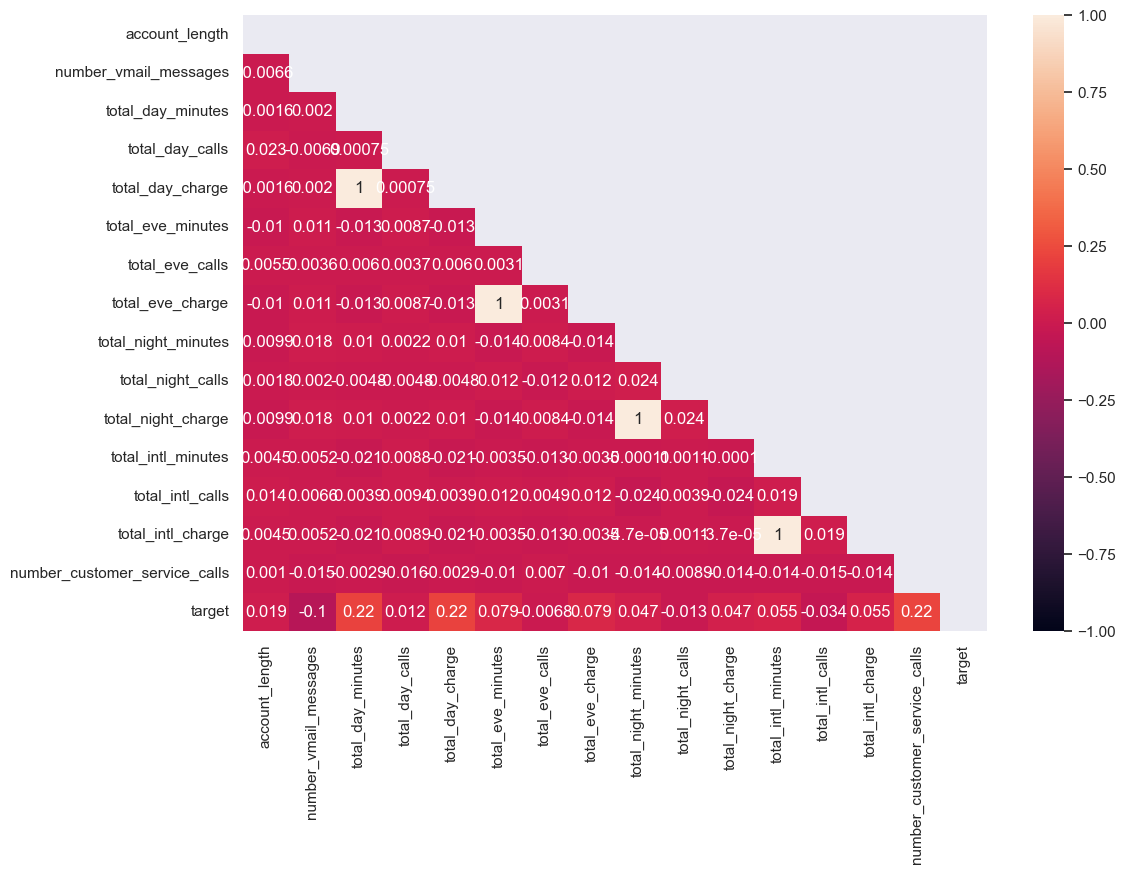

In [24]:
plt.figure(figsize=(12,8))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

## Outlier Detection

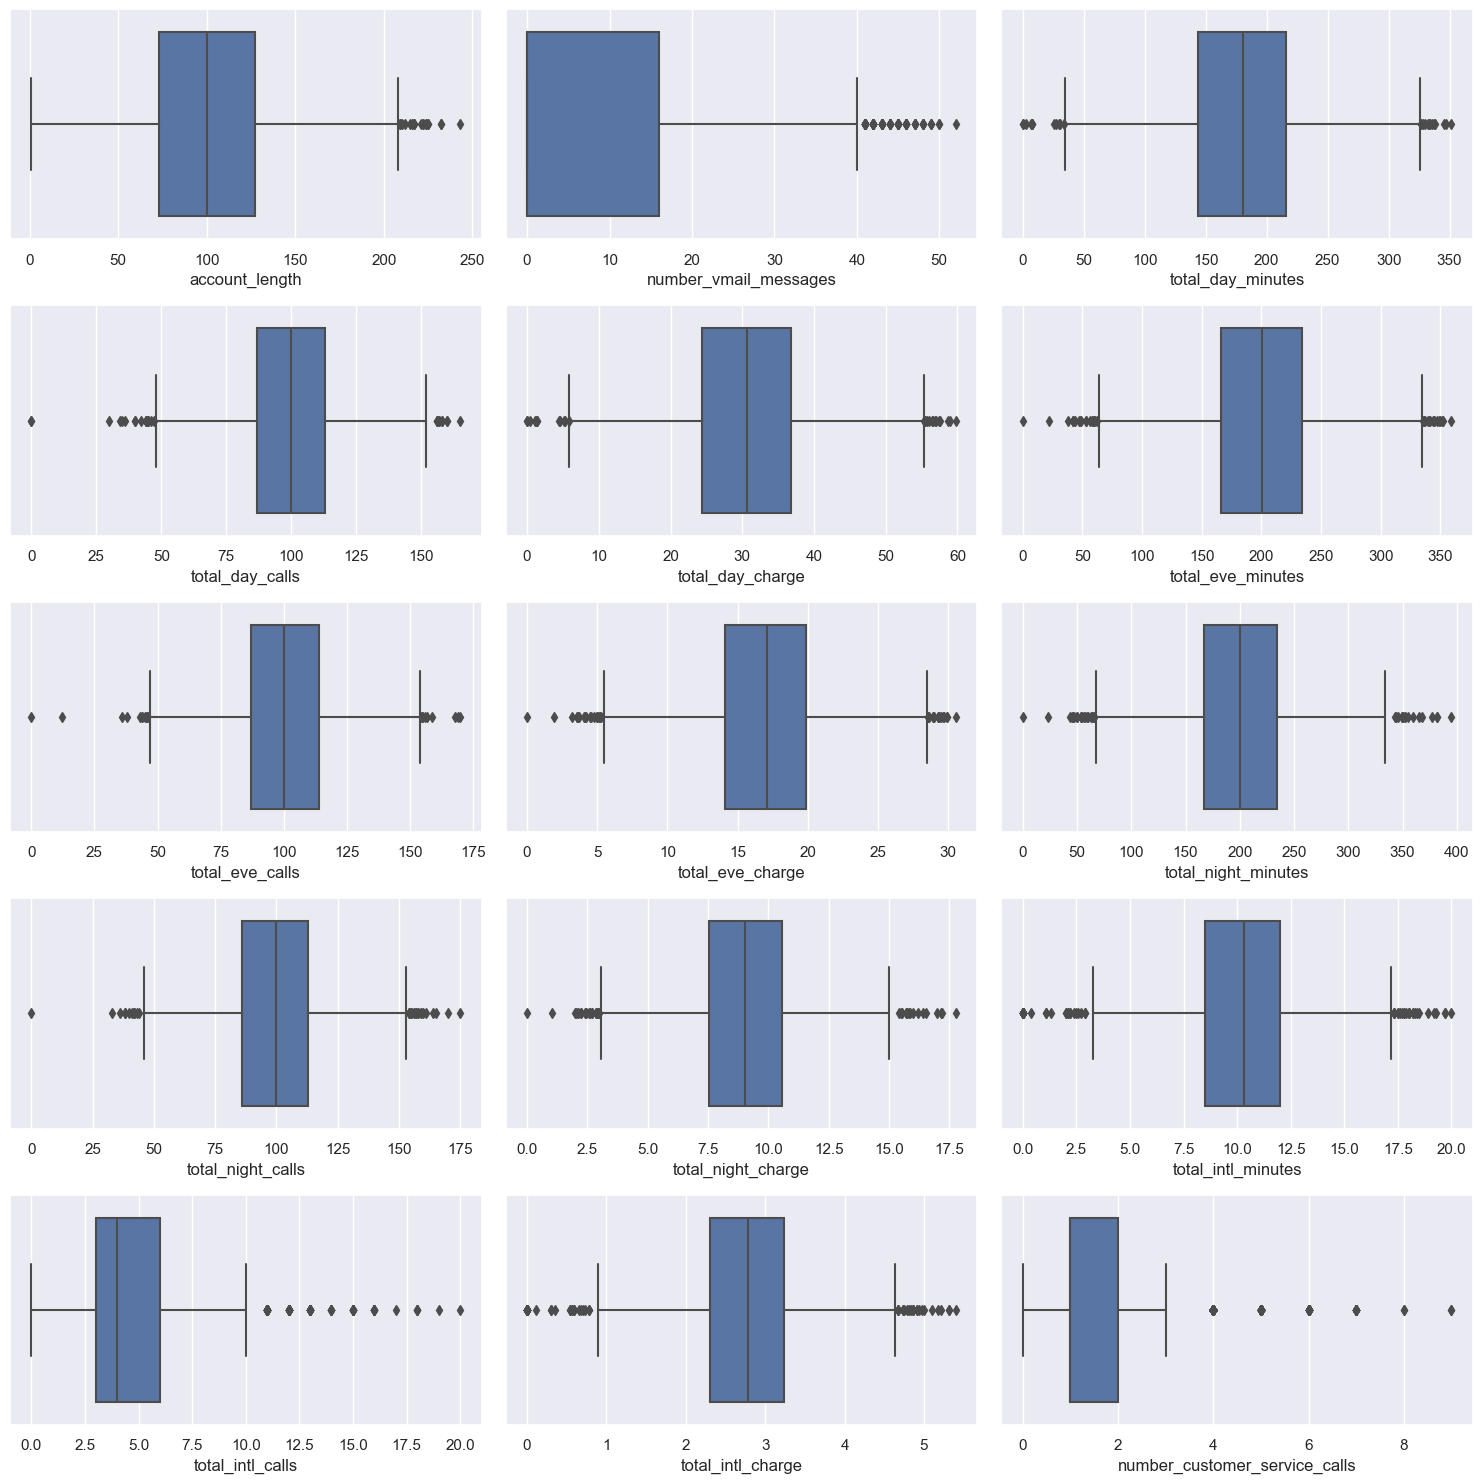

In [21]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(5, 3, figsize=(15, 15))
sns.boxplot(data=df_train, x='account_length', ax=ax[0][0])
sns.boxplot(data=df_train, x='number_vmail_messages', ax=ax[0][1])
sns.boxplot(data=df_train, x='total_day_minutes', ax=ax[0][2])
sns.boxplot(data=df_train, x='total_day_calls', ax=ax[1][0])
sns.boxplot(data=df_train, x='total_day_charge', ax=ax[1][1])
sns.boxplot(data=df_train, x='total_eve_minutes', ax=ax[1][2])
sns.boxplot(data=df_train, x='total_eve_calls', ax=ax[2][0])
sns.boxplot(data=df_train, x='total_eve_charge', ax=ax[2][1])
sns.boxplot(data=df_train, x='total_night_minutes', ax=ax[2][2])
sns.boxplot(data=df_train, x='total_night_calls', ax=ax[3][0])
sns.boxplot(data=df_train, x='total_night_charge', ax=ax[3][1])
sns.boxplot(data=df_train, x='total_intl_minutes', ax=ax[3][2])
sns.boxplot(data=df_train, x='total_intl_calls', ax=ax[4][0])
sns.boxplot(data=df_train, x='total_intl_charge', ax=ax[4][1])
sns.boxplot(data=df_train, x='number_customer_service_calls', ax=ax[4][2])
plt.tight_layout()
plt.show()

# Pre-processing Data

Pre-processing data meliputi:
- Data Reduction
- Handling Outlier
- Feature Encoding
- Standarization & Normalization

In [25]:
df_train.columns, df_test.columns

(Index(['account_length', 'international_plan', 'voice_mail_plan',
        'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
        'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
        'total_eve_charge', 'total_night_minutes', 'total_night_calls',
        'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
        'total_intl_charge', 'number_customer_service_calls', 'churn',
        'target'],
       dtype='object'),
 Index(['account_length', 'international_plan', 'voice_mail_plan',
        'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
        'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
        'total_eve_charge', 'total_night_minutes', 'total_night_calls',
        'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
        'total_intl_charge', 'number_customer_service_calls'],
       dtype='object'))

## Data Reduction

In [27]:
df_train.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','churn'], axis=1, inplace=True)
df_test.drop(['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes'], axis=1, inplace=True)

## Handling Outlier

In [28]:
df_train.select_dtypes(include=['number']).columns.tolist()

['account_length',
 'number_vmail_messages',
 'total_day_calls',
 'total_day_charge',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_calls',
 'total_night_charge',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'target']

In [29]:
num_feature = df_train.select_dtypes(include=['number']).columns[:-1].tolist()

In [31]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_train)}')

filtered_entries = np.array([True] * len(df_train))
for col in num_feature:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)

    IQR = Q3 - Q1
    high_limit = Q3 + (1.5*IQR)
    low_limit = Q1 - (1.5*IQR)

    filtered_entries = ((df_train[col] >= low_limit) & (df_train[col] <= high_limit)) & filtered_entries

df_train = df_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3515


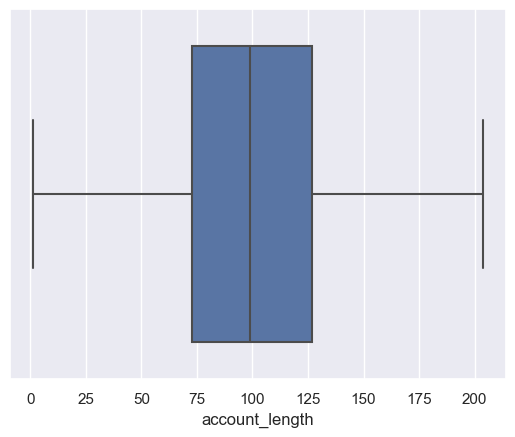

In [32]:
sns.boxplot(data=df_train, x='account_length')
plt.show()

## Feature Encoding

In [33]:
df_train['international_plan'] = LabelBinarizer().fit_transform(df_train['international_plan'])
df_train['voice_mail_plan'] = LabelBinarizer().fit_transform(df_train['voice_mail_plan'])

In [34]:
df_test['international_plan'] = LabelBinarizer().fit_transform(df_test['international_plan'])
df_test['voice_mail_plan'] = LabelBinarizer().fit_transform(df_test['voice_mail_plan'])

## Standardization and Normalization

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [36]:
X = df_train.drop(['target'], axis=1)
y = df_train['target']

In [37]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=45)

In [38]:
to_scale = [col for col in df_train.columns if df_train[col].max()>1]

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(x_train[to_scale])
x_train[to_scale] = scaler.transform(x_train[to_scale])
x_val[to_scale] = scaler.transform(x_val[to_scale])
df_test[to_scale] = scaler.transform(df_test[to_scale])

# Modeling & Evaluate Model

Algoritma yang akan digunakan antara lain:
- Logistict Regression
- Random Forest Classifier

Evaluate Metrics:
- Accuracy
- F1 Score
- ROC + AUC

In [39]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_curve

In [40]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(y_val, predictions)))
    print('F1-Score = {:0.2f}'.format(f1_score(y_val, predictions)))

## Logistic Regression Model

In [41]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [42]:
evaluate(lr_model, x_val, y_val)

Model Performance
Average Error: 0.1047 degrees.
Accuracy = 0.90%.
F1-Score = 0.29


In [43]:
lr_score_train = lr_model.score(x_train, y_train)
lr_score_test = lr_model.score(x_val, y_val)

(lr_score_train, lr_score_test)

(0.9131259484066768, 0.8953356086461889)

## Random Forest Model

In [44]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
evaluate(rf_model, x_val, y_val)

Model Performance
Average Error: 0.0387 degrees.
Accuracy = 0.96%.
F1-Score = 0.78


In [46]:
rf_score_train = rf_model.score(x_train, y_train)
rf_score_test = rf_model.score(x_val, y_val)

(rf_score_train, rf_score_test)

(1.0, 0.9613196814562003)

## Tuning Parameter Logistic Regression

In [47]:
params = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4,4,20)
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
lr_grid_model = GridSearchCV(LogisticRegression(), param_grid=params, scoring='accuracy', cv=kfold)

lr_grid_model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [48]:
lr_grid_model.best_score_

0.9233734402852051

In [49]:
lr_grid_model.best_params_

{'C': 78.47599703514607, 'penalty': 'l2'}

In [50]:
evaluate(lr_grid_model, x_val, y_val)

Model Performance
Average Error: 0.0944 degrees.
Accuracy = 0.91%.
F1-Score = 0.42


## Tuning Parameter Random Forest

In [51]:
params = {
    'bootstrap': [True],
    'max_depth': [6, 10, 25, 50],
    'max_features': [2, 4, 6, 8, 10, 15, 25],
    'n_estimators': [50, 60, 80, 100]
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
rf_grid_model = GridSearchCV(RandomForestClassifier(), param_grid=params, scoring='accuracy', cv=kfold)

rf_grid_model.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [6, 10, 25, 50],
                         'max_features': [2, 4, 6, 8, 10, 15, 25],
                         'n_estimators': [50, 60, 80, 100]},
             scoring='accuracy')

In [52]:
rf_grid_model.best_score_

0.9658566212408717

In [53]:
rf_grid_model.best_params_

{'bootstrap': True, 'max_depth': 25, 'max_features': 6, 'n_estimators': 60}

In [54]:
evaluate(rf_grid_model, x_val, y_val)

Model Performance
Average Error: 0.0364 degrees.
Accuracy = 0.96%.
F1-Score = 0.80


# ROC + AUC Curva

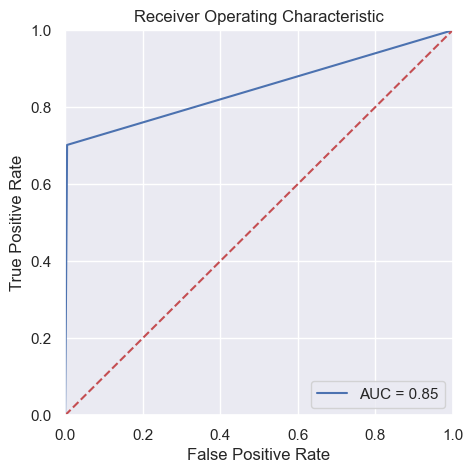

In [55]:
rf_grid_predict = rf_grid_model.predict(x_val)

fpr, tpr, treshold = roc_curve(y_val, rf_grid_predict)
roc_auc = auc(fpr, tpr)
f, ax = plt.subplots(figsize=(5, 5))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# END